In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime,timedelta
import yfinance as yf 
from nselib import capital_market 
import os 
from lightweight_charts import Chart
import vectorbt as vbt 
from tabulate import tabulate 
from tqdm import tqdm
import talib as ta 
import time 
from IPython.display import display,clear_output
import ipywidgets as ipy
from scipy import stats
import plotly.graph_objects as go
from scipy.stats import norm
sns.set_style('darkgrid')
plt.style.use('ggplot')
!jupyter labextension enable @jupyter-widgets/jupyterlab-manager


In [2]:
os.getcwd()
if not os.path.exists("data-1d"):
    os.mkdir('data-1d')
else:
    print("Folder present")

Folder present


In [3]:
#getting All symbols
nifty_50=capital_market.nifty50_equity_list()['Symbol']
a=[[i] for i in nifty_50]
head=['index','symbols']
print(tabulate(a, headers=head, tablefmt="fancy_grid",showindex=True))


╒═════════╤════════════╕
│   index │ symbols    │
╞═════════╪════════════╡
│       0 │ ADANIENT   │
├─────────┼────────────┤
│       1 │ ADANIPORTS │
├─────────┼────────────┤
│       2 │ APOLLOHOSP │
├─────────┼────────────┤
│       3 │ ASIANPAINT │
├─────────┼────────────┤
│       4 │ AXISBANK   │
├─────────┼────────────┤
│       5 │ BAJAJ-AUTO │
├─────────┼────────────┤
│       6 │ BAJFINANCE │
├─────────┼────────────┤
│       7 │ BAJAJFINSV │
├─────────┼────────────┤
│       8 │ BPCL       │
├─────────┼────────────┤
│       9 │ BHARTIARTL │
├─────────┼────────────┤
│      10 │ BRITANNIA  │
├─────────┼────────────┤
│      11 │ CIPLA      │
├─────────┼────────────┤
│      12 │ COALINDIA  │
├─────────┼────────────┤
│      13 │ DIVISLAB   │
├─────────┼────────────┤
│      14 │ DRREDDY    │
├─────────┼────────────┤
│      15 │ EICHERMOT  │
├─────────┼────────────┤
│      16 │ GRASIM     │
├─────────┼────────────┤
│      17 │ HCLTECH    │
├─────────┼────────────┤
│      18 │ HDFCBANK   │


In [4]:
class download_symb:
    def __init__(self,symbol):
        self.symbol=symbol
    def symb(self):
        end_date=datetime.now().date()
        start_date=end_date-timedelta(days=252)
        try:
            #data_sym=yf.download(f'{self.symbol}.NS',start=start_date,end=end_date,period='1d')#interval="1m" )
            #self.data=data_sym.to_parquet(f'data-1d/{self.symbol}.parquet')
            self.data=pd.read_parquet(f'data-1d/{self.symbol}.parquet')            
        except Exception as e:
            print("File not downloaded")
        return(self.data)
    def analysis(self):
        self.close=self.data['Close']
        self.data_returns=np.log(self.close).diff()
        return
        

In [5]:
data=download_symb(nifty_50[0])
data.symb()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-22,2425.100098,2449.949951,2360.000000,2397.250000,2396.052979,8459191
2023-06-23,2392.300049,2392.300049,2163.300049,2233.550049,2232.434570,15213238
2023-06-26,2210.050049,2336.449951,2173.050049,2295.600098,2294.453857,7847341
2023-06-27,2328.949951,2343.850098,2271.000000,2284.449951,2283.309082,3361053
2023-06-28,2300.000000,2418.600098,2293.850098,2402.000000,2400.800537,28353193
...,...,...,...,...,...,...
2024-02-22,3239.000000,3274.000000,3210.500000,3263.050049,3263.050049,1138722
2024-02-23,3263.050049,3319.949951,3225.100098,3273.300049,3273.300049,1975035
2024-02-26,3272.000000,3344.000000,3263.000000,3327.750000,3327.750000,1695378


In [6]:
def plot_close(cl):
    data=download_symb(cl)
    data.symb()
    data.analysis()
    data.close.plot()
    plt.ylabel('Price')
select=ipy.Dropdown(options=(nifty_50))
ipy.interact(plot_close,cl=nifty_50);

interactive(children=(Dropdown(description='cl', options=('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT'…

In [7]:
    
def plot_candel(cl):
    clear_output(wait=True)
    data=download_symb(cl)
    data.symb()
    dfpl=data.data
    fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])
    fig.update_layout(
    autosize=False,
    width=1000,
    height=800, 
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis=dict(gridcolor='grey'),
    yaxis=dict(gridcolor='grey')
    )
    #fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",marker=dict(size=8, color="MediumPurple"),name="Signal")
    fig.show()
select=ipy.Dropdown(options=(nifty_50))
ipy.interact(plot_candel,cl=select);

interactive(children=(Dropdown(description='cl', options=('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT'…

In [8]:
daily_returns={}
for i in tqdm(range(0,len(nifty_50))):
    try:
        data=download_symb(nifty_50[i])
        data.symb()
        data.analysis()
        daily_returns[nifty_50[i]]=data.data_returns
        
    except Exception as e:
        continue

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 85.73it/s]


In [9]:
daily_returns=pd.DataFrame(daily_returns)
daily_returns.dropna(inplace=True)
daily_returns.head()

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-23,-0.070730,-0.042886,-0.004065,0.015170,-0.008519,0.002274,-0.005756,-0.003788,-0.037658,0.014138,...,0.001161,-0.006863,-0.001248,-0.017184,-0.013593,-0.003177,-0.010526,-0.011258,-0.010164,-0.006166
2023-06-26,0.027402,0.014041,-0.001686,0.003164,0.002241,-0.003402,0.001294,0.003722,-0.003622,-0.003340,...,0.003524,-0.008336,0.025480,0.014546,0.002278,-0.003232,0.011317,0.018351,0.010697,0.002497
2023-06-27,-0.004869,-0.005745,0.020797,0.005381,0.013135,0.002417,0.002932,0.010163,0.005705,0.015086,...,0.006861,0.002411,-0.009728,0.009203,0.008160,0.006990,0.001042,-0.007166,0.005056,0.004453
2023-06-28,0.050176,0.049104,-0.003096,0.006667,0.005073,0.021052,0.010057,-0.002696,0.013917,0.008405,...,0.019767,0.005645,0.000878,0.023368,0.007198,-0.010414,0.017456,0.008858,0.006333,-0.002355
2023-06-30,-0.005825,-0.023066,-0.005614,0.004113,0.009412,-0.005262,0.009880,0.006006,-0.001917,0.007482,...,0.028747,0.026637,0.006935,0.015057,0.004026,0.020323,0.006435,0.010527,0.004119,0.019330


In [10]:
corr=daily_returns.corr()
corr.head()

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
ADANIENT,1.000000,0.827450,0.081310,0.204484,0.143850,0.130868,0.132795,0.107906,0.287339,0.111920,...,0.117010,0.073567,0.136397,0.300863,0.290349,0.106074,0.221985,0.245815,0.217555,0.091101
ADANIPORTS,0.827450,1.000000,0.107288,0.191330,0.172533,0.152698,0.208923,0.171531,0.309729,0.059323,...,0.165342,0.104267,0.175074,0.277918,0.279966,0.095238,0.267632,0.257626,0.180150,0.129503
APOLLOHOSP,0.081310,0.107288,1.000000,0.258024,0.161451,0.146888,0.204358,0.151383,0.143959,0.282914,...,0.310630,0.011209,0.097696,0.197379,0.172210,0.213877,0.267256,0.308353,0.251366,0.182699
ASIANPAINT,0.204484,0.191330,0.258024,1.000000,0.211619,0.102281,0.291762,0.220644,0.172031,0.089893,...,0.054619,0.249579,0.251802,0.117500,0.208261,0.268231,0.309738,0.327729,0.200225,0.242672
AXISBANK,0.143850,0.172533,0.161451,0.211619,1.000000,0.142360,0.260291,0.218696,0.060354,0.143277,...,0.055675,0.048101,0.137083,0.171258,0.230760,0.126449,0.089728,0.248871,0.232255,0.138726


<Axes: >

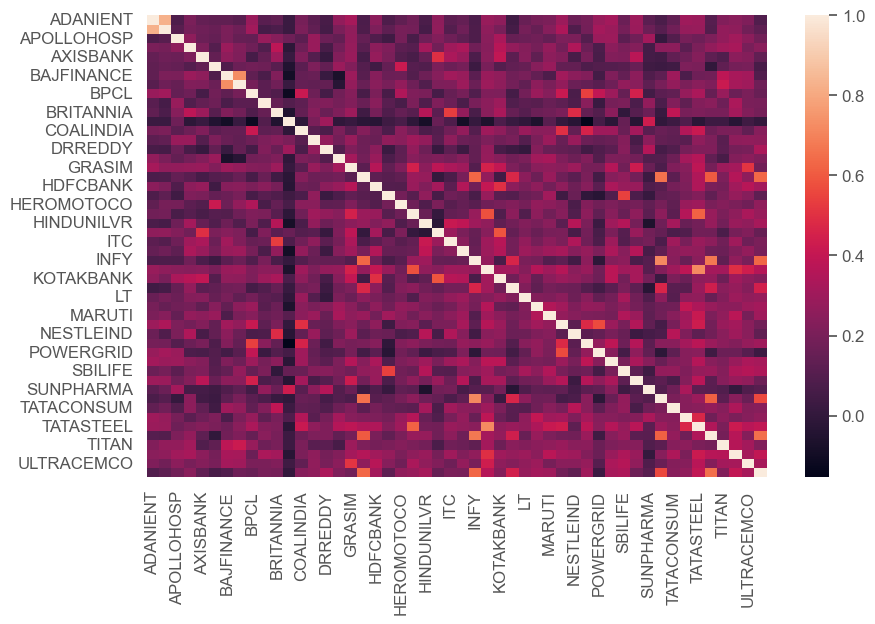

In [11]:
sns.heatmap(corr)

In [12]:
def plotting(symb):
    daily_returns.loc[:,symb].plot(color='blue')
    plt.title("DAILY RETURNS")
    plt.axhline(y=0,color='black')
select=ipy.Dropdown(options=(nifty_50))
ipy.interact(plotting,symb=nifty_50);

interactive(children=(Dropdown(description='symb', options=('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAIN…

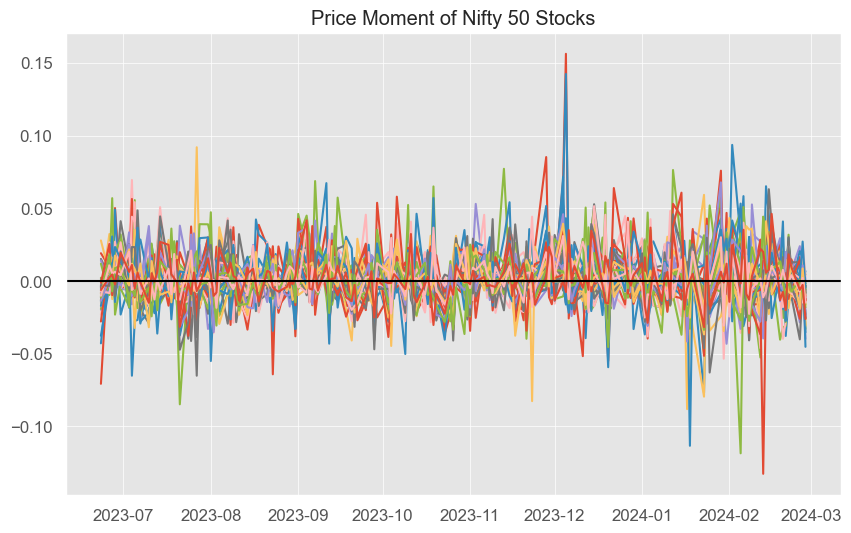

In [13]:
plt.plot(daily_returns)
plt.title("Price Moment of Nifty 50 Stocks")
plt.axhline(y=0,color='black');

In [14]:
daily_returns.describe()

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,0.001744,0.003287,0.001348,-0.000890,0.000625,0.003397,-0.000465,0.000294,0.002897,0.001729,...,0.002741,0.001423,0.001937,0.003079,0.001400,0.000822,0.001129,-0.002063,0.001085,0.001794
std,0.023031,0.021017,0.014030,0.010894,0.012951,0.014823,0.014666,0.012775,0.019350,0.010982,...,0.010831,0.012561,0.011924,0.014075,0.014081,0.015931,0.011015,0.016164,0.012664,0.015321
min,-0.070730,-0.059313,-0.039788,-0.041278,-0.044690,-0.033014,-0.053472,-0.032449,-0.043116,-0.032904,...,-0.024141,-0.027814,-0.027671,-0.033171,-0.042624,-0.062951,-0.034440,-0.118533,-0.030683,-0.031732
25%,-0.009121,-0.007299,-0.006408,-0.003945,-0.007458,-0.005712,-0.008826,-0.007343,-0.008349,-0.003823,...,-0.003777,-0.005909,-0.006014,-0.006413,-0.006208,-0.007988,-0.005043,-0.009635,-0.007110,-0.006166
50%,0.001314,0.001435,0.000104,0.000482,0.000500,0.002329,-0.001365,0.000031,0.002631,0.000250,...,0.002200,0.000756,0.002067,0.000565,0.001896,0.000498,0.000623,-0.000334,0.001461,-0.000261
75%,0.009503,0.012291,0.009639,0.005909,0.010076,0.009460,0.006475,0.006091,0.012070,0.007929,...,0.007690,0.006651,0.008929,0.012971,0.009302,0.008021,0.008778,0.006681,0.006946,0.006638
max,0.156276,0.142384,0.053039,0.022136,0.037481,0.065042,0.069459,0.057992,0.093619,0.034315,...,0.033477,0.051484,0.043056,0.053237,0.038082,0.045874,0.028579,0.044167,0.040823,0.063926


In [15]:
stats.describe(daily_returns['ADANIENT'])

DescribeResult(nobs=169, minmax=(-0.07072997724189545, 0.1562762033254801), mean=0.0017440739956509866, variance=0.0005304182578484507, skewness=1.8548270167165688, kurtosis=12.671291792802693)

In [16]:
def statis(symb):
    nobs,minmax,mean,variance,skewness,kurtosis=stats.describe(daily_returns[symb])
    mini,maxi=minmax
    std=variance**0.5
    print(f'\n nobs:{nobs}\n mean: {mean} \n variance: {variance}\n skewness: {skewness}\n kurtosis: {kurtosis}\n mini: {mini}\n maxi:{maxi}\n std: {std}')
    #return(nobs,mean,variance,skewness,kurtosis,mini,maxi,std)
    #nobs,mini,maxi,mean,variance,skewness,kurtosis,std)

In [17]:
select=ipy.Dropdown(options=(nifty_50))
ipy.interact(statis,symb=nifty_50);

interactive(children=(Dropdown(description='symb', options=('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAIN…

**Skewness**:

Skewness measures the asymmetry of the distribution.
A skewness value of 0 indicates a symmetrical distribution. Positive skewness (skewness > 0) indicates that the distribution is skewed to the right (tail extends towards higher values), while negative skewness (skewness < 0) indicates that the distribution is skewed to the left (tail extends towards lower values).
Skewness can help identify whether the majority of the data points are concentrated on one side of the distribution or if there is a long tail on one side.
Kurtosis:

**Kurtosis** measures the "tailedness" or peakedness of the distribution.
A kurtosis value of 3 (excess kurtosis = 0) indicates a normal distribution (mesokurtic). Higher kurtosis (excess kurtosis > 0) indicates heavier tails and a more peaked distribution (leptokurtic), while lower kurtosis (excess kurtosis < 0) indicates lighter tails and a flatter distribution (platykurtic).
Kurtosis can help distinguish between distributions with similar skewness but different tail behaviors.

In [18]:
print(statis('ADANIENT'))


 nobs:169
 mean: 0.0017440739956509866 
 variance: 0.0005304182578484507
 skewness: 1.8548270167165688
 kurtosis: 12.671291792802693
 mini: -0.07072997724189545
 maxi:0.1562762033254801
 std: 0.02303081105494226
None


Here's what a histogram can tell you about your data:

**Distribution of Data**: Histograms provide a visual representation of how data is distributed across different ranges or intervals. You can quickly see whether the data is skewed to one side or if it is symmetrically distributed.

**Central Tendency**: If the histogram is roughly symmetric, you can infer that the central tendency of the data (mean, median, mode) is around the center of the histogram. However, if the histogram is skewed, the central tendency may be biased towards one side.

**Variability**: The width and shape of the histogram's peaks and valleys can give you insights into the variability or dispersion of the data. A wider histogram indicates greater variability, while a narrower histogram suggests less variability.

**Outliers**: Histograms can help identify outliers or extreme values in the data. Outliers may appear as isolated bars or bins that are significantly higher or lower than the rest of the distribution.

**Patterns and Trends**: By examining the shape and structure of the histogram, you may detect patterns or trends in the data, such as multimodality (multiple peaks), symmetry, skewness, or clustering.

Text(0.5, 1.0, 'Daily Returns Hist plots for Nifty 50 Stock')

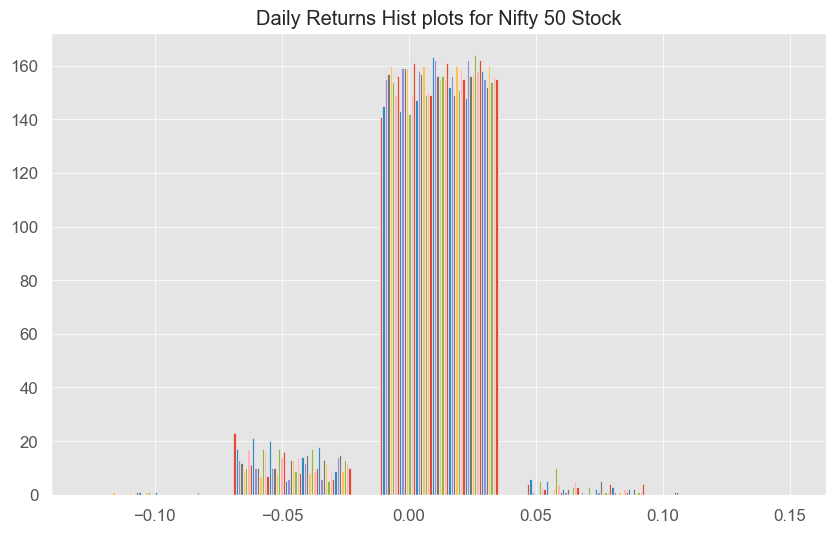

In [19]:
plt.hist(daily_returns,bins=5);
plt.title("Daily Returns Hist plots for Nifty 50 Stock")

Text(0.5, 1.0, 'Daily Returns Adanient')

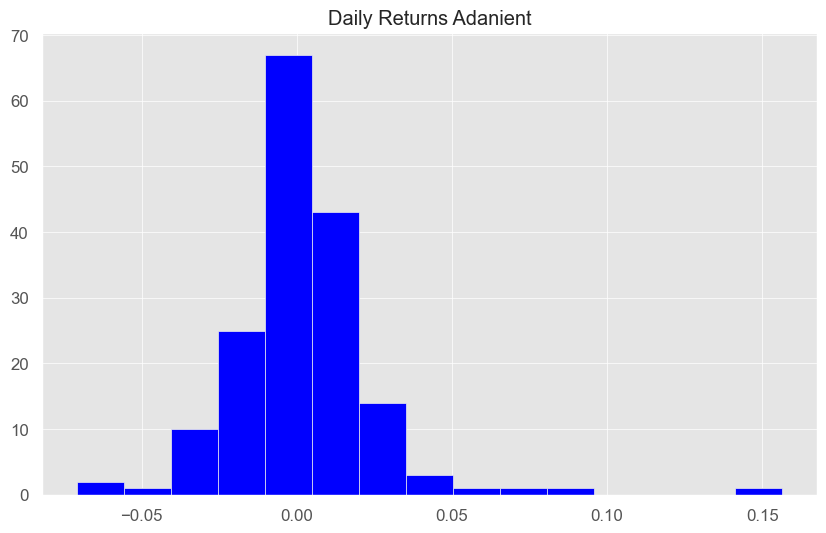

In [20]:
plt.hist(daily_returns['ADANIENT'],bins=15,color='blue');
plt.title("Daily Returns Adanient")

In [21]:
stats.describe(daily_returns['ADANIENT'])

DescribeResult(nobs=169, minmax=(-0.07072997724189545, 0.1562762033254801), mean=0.0017440739956509866, variance=0.0005304182578484507, skewness=1.8548270167165688, kurtosis=12.671291792802693)

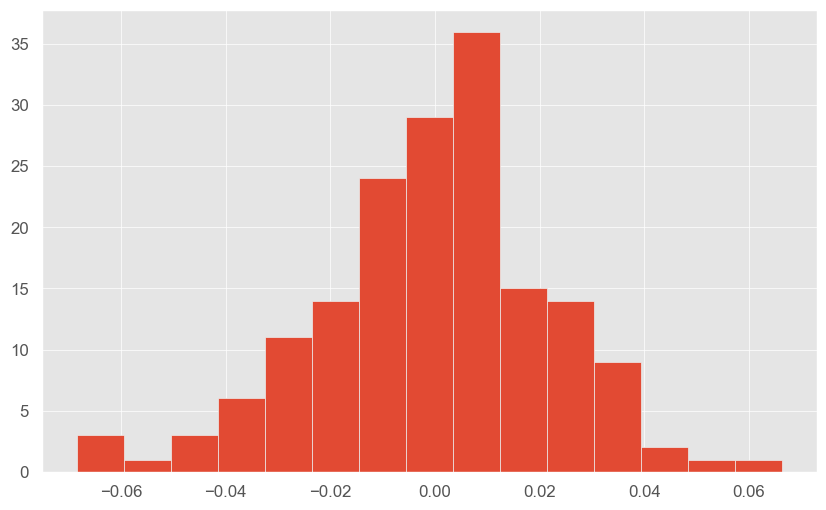

In [22]:
nobs,minmax,mean,variance,skewness,kurtosis=stats.describe(daily_returns['ADANIENT'])
mini,maxi=minmax
std=variance**0.5
x=norm.rvs(mean,std,nobs)
#randomsample 
plt.hist(x,bins=15);

**Checking if the price is normally distributed**

**The null hypothesis (H0)** is a fundamental concept in statistical hypothesis testing. It represents the default assumption or the status quo that there is no effect, no difference, or no relationship between variables under investigation.

The outcome of hypothesis testing can lead to one of two conclusions:

1)Rejecting the null hypothesis: This suggests that there is sufficient evidence to support the alternative hypothesis, indicating that the observed differences or effects are unlikely to be due to random chance alone.

2)Failing to reject the null hypothesis: This suggests that there is insufficient evidence to support the alternative hypothesis, and the observed differences or effects could plausibly be due to random variation.

In [23]:
x_test=stats.kurtosistest(x)
kurt_test=stats.kurtosistest(daily_returns['ADANIENT'])

In [24]:
x[0],x[1]

(-0.003494780763340803, -0.001325295089566168)

In [25]:
kurt_test[0]

6.91453234324307

In [26]:
kurt_test[1]

4.6940930805161165e-12

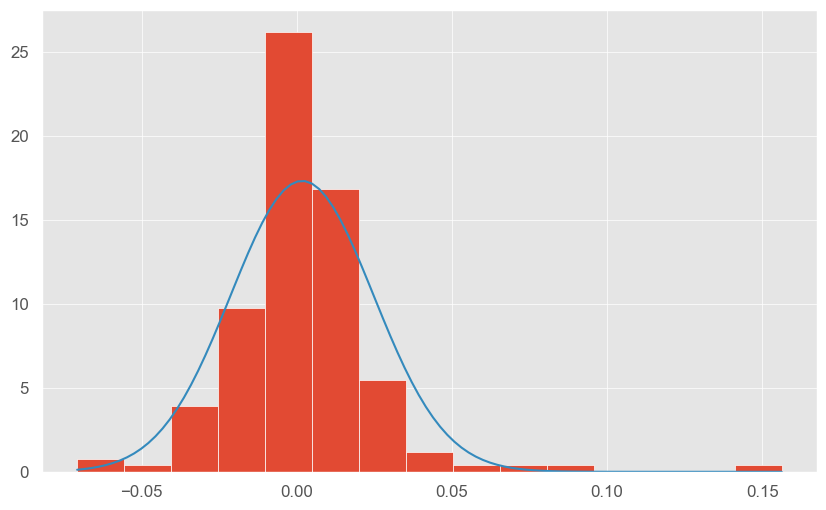

In [27]:
plt.hist(daily_returns['ADANIENT'],bins=15,edgecolor='w',density=True)
overlay=np.linspace(mini,maxi,100)
plt.plot(overlay,norm.pdf(overlay,mean,std));

In [28]:
stats.ttest_1samp(daily_returns,0,alternative='two-sided')


TtestResult(statistic=array([ 0.98446216,  2.03334045,  1.24921194, -1.06234036,  0.62692034,
        2.97912682, -0.41217308,  0.29936807,  1.94661347,  2.04630154,
       -0.14383613,  1.86094253,  2.5656481 , -0.04105998,  1.67529187,
        0.39754045,  1.3791023 ,  1.90021677, -0.94270167, -0.51210825,
        2.04895549,  0.75126516, -0.67692199,  0.89862137, -0.62150047,
        0.66488296,  1.32433872,  0.35183509, -0.63344202,  0.33884247,
        2.11022899,  1.49527668,  1.11635531,  2.8360986 ,  0.91398585,
        2.39313755,  1.79303441,  1.39911776,  1.09156177,  1.55844707,
        3.2902028 ,  1.47276148,  2.11170044,  2.84409441,  1.29226436,
        0.67086391,  1.33250357, -1.65906939,  1.11339104,  1.52226911]), pvalue=array([0.32630399, 0.04359175, 0.21332528, 0.2896059 , 0.53156248,
       0.00331924, 0.68073801, 0.76502926, 0.05324903, 0.04228522,
       0.88580226, 0.06449977, 0.01117208, 0.96729684, 0.09573727,
       0.69147361, 0.16969644, 0.05911756, 0.347

In [29]:
obj=download_symb('ADANIENT')
new_data=obj.symb()
new_data['shift_1']=new_data.Close.shift(1)
new_data['shift_2']=new_data.Close.shift(2)
new_data.dropna(inplace=True)
new_data

,Open,High,Low,Close,Adj Close,Volume,shift_1,shift_2
Date,,,,,,,,
2023-06-26,2210.050049,2336.449951,2173.050049,2295.600098,2294.453857,7847341,2233.550049,2397.250000
2023-06-27,2328.949951,2343.850098,2271.000000,2284.449951,2283.309082,3361053,2295.600098,2233.550049
2023-06-28,2300.000000,2418.600098,2293.850098,2402.000000,2400.800537,28353193,2284.449951,2295.600098
2023-06-30,2437.949951,2437.949951,2350.000000,2388.050049,2386.857422,5125497,2402.000000,2284.449951
2023-07-03,2405.000000,2417.850098,2373.199951,2385.500000,2384.308838,2662358,2388.050049,2402.000000
...,...,...,...,...,...,...,...,...
2024-02-22,3239.000000,3274.000000,3210.500000,3263.050049,3263.050049,1138722,3223.199951,3228.600098
2024-02-23,3263.050049,3319.949951,3225.100098,3273.300049,3273.300049,1975035,3263.050049,3223.199951
2024-02-26,3272.000000,3344.000000,3263.000000,3327.750000,3327.750000,1695378,3273.300049,3263.050049


In [30]:
lr=np.linalg.lstsq(new_data[['shift_1','shift_2']],new_data.Close,rcond=None)[0]
lr


array([ 1.05491921, -0.05301396])

In [31]:
new_data['predict']=np.dot(new_data[['shift_1','shift_2']],lr)
new_data.head()

,Open,High,Low,Close,Adj Close,Volume,shift_1,shift_2,predict
Date,,,,,,,,,
2023-06-26,2210.050049,2336.449951,2173.050049,2295.600098,2294.453857,7847341,2233.550049,2397.250000,2229.127158
2023-06-27,2328.949951,2343.850098,2271.000000,2284.449951,2283.309082,3361053,2295.600098,2233.550049,2303.263328
2023-06-28,2300.000000,2418.600098,2293.850098,2402.000000,2400.800537,28353193,2284.449951,2295.600098,2288.211306
2023-06-30,2437.949951,2437.949951,2350.000000,2388.050049,2386.857422,5125497,2402.000000,2284.449951,2412.808225
2023-07-03,2405.000000,2417.850098,2373.199951,2385.500000,2384.308838,2662358,2388.050049,2402.000000,2391.860360


Text(0.5, 1.0, 'predicted vs actual')

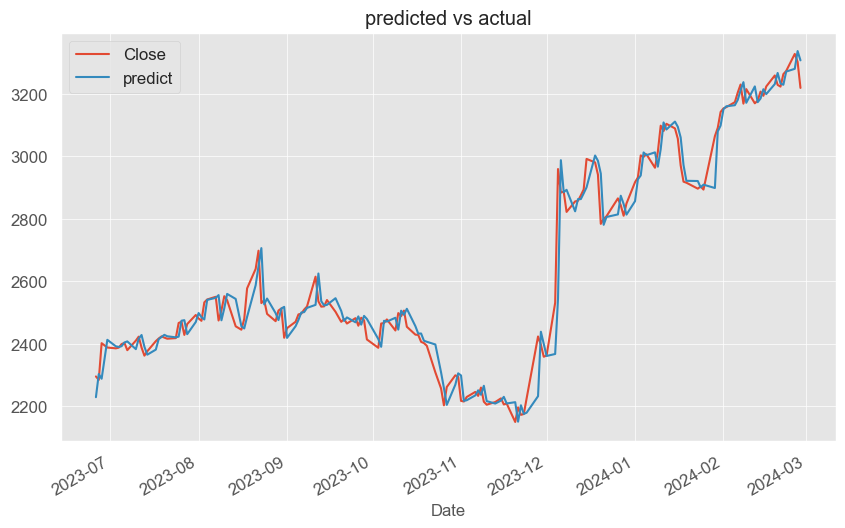

In [32]:
new_data[['Close','predict']].plot()
plt.title("predicted vs actual")

In [33]:
# DOing Addfuller Test 

**The Augmented Dickey-Fuller (ADF)** test is a statistical test used to determine whether a unit root is present in a time series dataset. It is commonly used to test for stationarity in time series data. Stationarity is an important concept in time series analysis because many time series models assume that the underlying data is stationary.

Here's an overview of the ADF test:

**Null Hypothesis (H0)**: The null hypothesis of the ADF test is that the time series has a unit root, indicating that it is non-stationary.

**Alternative Hypothesis (H1)**: The alternative hypothesis is that the time series does not have a unit root, indicating that it is stationary.

**Test Statistic**: The ADF test statistic is a negative number. The more negative it is, the stronger the evidence against the null hypothesis.

**Critical Values:** The critical values of the ADF test depend on the sample size and the significance level chosen for the test. The test statistic is compared to these critical values to determine whether to reject the null hypothesis.

**Interpretation:** If the test statistic is less than the critical value, we reject the null hypothesis and conclude that the time series is stationary. If the test statistic is greater than the critical value, we fail to reject the null hypothesis, indicating that the time series is non-stationary.

In [34]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(new_data.Close,maxlag=1)


In [35]:
adf[0]

-0.6990200605033605

**since adf[0] > adf 10% :  price is not stationary**

In [36]:
adf[4]

{'1%': -3.470126426071447,
 '5%': -2.8790075987120027,
 '10%': -2.5760826967621644}

**Doing Monte Carlo Simulation**

In [37]:
mu,sigma=daily_returns['ADANIENT'].mean(),daily_returns['ADANIENT'].std()
sim=np.random.normal(mu,sigma,252)
sim[:5]

array([ 0.05325328, -0.01500657,  0.00551424,  0.01762691,  0.01809213])

In [38]:
inital=new_data['Adj Close'].iloc[-1]
sim_price=inital*(sim+1).cumprod()

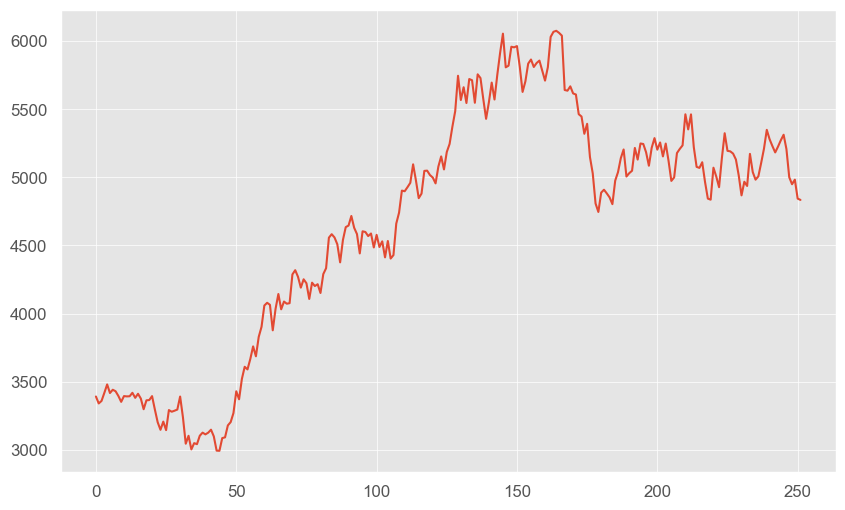

In [39]:
plt.plot(sim_price)

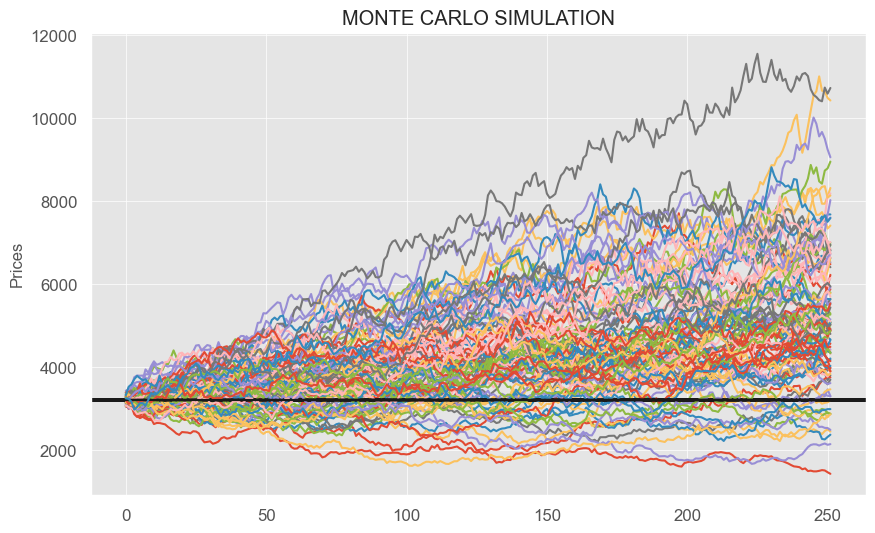

In [41]:
for i in range(100):
    sim=np.random.normal(mu,sigma,252)
    sim_price=inital*(sim+1).cumprod()
    plt.title("MONTE CARLO SIMULATION")
    plt.ylabel('Prices')
    plt.axhline(inital,c='k')
    plt.plot(sim_price)
    